In [42]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

from networkx import group_closeness_centrality
from networkx import group_betweenness_centrality

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #ez hogy a rákban nem a defaultja a jupyternek?

# saját függvényeink
from functions import *

In [2]:
monthly_bipartite = acquireSplitData()
projected_graph = listMEPs()

In [14]:
months = []
for month in monthly_bipartite:
    nxgraph = nx.from_pandas_edgelist(month, source='AmendmentID', target='MEPName')
    meps = pd.unique(month['MEPName'])
    #print(nx.algorithms.bipartite.projected_graph(nxgraph, meps).nodes)
    months.append(nx.algorithms.bipartite.weighted_projected_graph(nxgraph, meps))

In [39]:
print(months[0].edges.data("weight", default=0))


[('César LUENA', 'Javi LÓPEZ', 2), ('César LUENA', 'Nicolás GONZÁLEZ CASARES', 2), ('César LUENA', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 2), ('Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ', 2), ('Cristina MAESTRE MARTÍN DE ALMAGRO', 'Nicolás GONZÁLEZ CASARES', 2), ('Javi LÓPEZ', 'Nicolás GONZÁLEZ CASARES', 2), ('Carlo FIDANZA', 'Eugen JURZYCA', 3), ('Carlo FIDANZA', 'Adam BIELAN', 3), ('Carlo FIDANZA', 'Evžen TOŠENOVSKÝ', 1), ('Carlo FIDANZA', 'Beata MAZUREK', 3), ('Eugen JURZYCA', 'Adam BIELAN', 4), ('Eugen JURZYCA', 'Evžen TOŠENOVSKÝ', 2), ('Eugen JURZYCA', 'Beata MAZUREK', 4), ('Adam BIELAN', 'Evžen TOŠENOVSKÝ', 2), ('Adam BIELAN', 'Beata MAZUREK', 4), ('Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 2), ('Dita CHARANZOVÁ', 'Svenja HAHN', 1), ('Anna BONFRISCO', 'Matteo ADINOLFI', 1), ('Anna BONFRISCO', 'Hélène LAPORTE', 4), ('Anna BONFRISCO', 'Isabella ADINOLFI', 3), ('Anna BONFRISCO', 'Joachim KUHS', 4), ('Anna BONFRISCO', 'Valentino GRANT', 4), ('Anna BONFRISCO', 'Annalisa TARDINO', 4), 

This calculates simultaneously 4 different group centrality measures on the groups of Parties:

In [43]:
monthly_closeness_centality_by_party = []
#monthly_weighted_closeness_centality_by_party = []
monthly_betweenness_centality_by_party = []
#monthly_weighted_betweenness_centality_by_party = []
for month in months:
    curr_cls = {}
    #curr_w_cls = {}
    curr_btw = {}
    #curr_w_btw = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for party in listPoliticalGroups():
        partymeps = set(listMEPs_by_polgroup(party)) & monthly_meps
        if partymeps == set():
            curr[party] = 0
        else:
            curr_cls[party] = group_closeness_centrality(month, partymeps, weight=None)
            #curr_w_cls[party] = group_closeness_centrality(month, partymeps, weight=month.edges.data("weight", default=0) )
            curr_btw[party] = group_betweenness_centrality(month, partymeps, weight=None)
            #curr_w_btw[party] = group_betweenness_centrality(month, partymeps, weight=month.edges.data("weight", default=0))
            
    monthly_closeness_centality_by_party.append(curr_cls)
    #monthly_weighted_closeness_centality_by_party.append(curr_w_cls)
    monthly_betweenness_centality_by_party.append(curr_btw)
    #monthly_weighted_betweenness_centality_by_party.append(curr_w_btw)
    
monthly_closeness_centality_by_party = pd.DataFrame(monthly_closeness_centality_by_party)
#monthly_weighted_closeness_centality_by_party = pd.DataFrame(monthly_weighted_closeness_centality_by_party)
monthly_betweenness_centality_by_party = pd.DataFrame(monthly_betweenness_centality_by_party)
#monthly_weighted_betweenness_centality_by_party = pd.DataFrame(monthly_weighted_betweenness_centality_by_party)
#print(monthly_closeness_centality_by_party)

          EPP         ECR          ID  Greens/EFA         RE         S&D  \
0    6.750000    0.000000   59.000000    0.000000   0.000000    0.000000   
1    0.000000    4.692308   59.000000    0.000000  24.500000    0.000000   
2    0.880000   89.000000    0.000000    0.459057   1.985714    1.278689   
3    0.666667    0.569832  195.000000    1.082902   1.261745    1.242857   
4    0.710526    0.634518    0.394984    0.522822   0.815789    1.004975   
5   51.750000  108.000000   71.333333    0.883534   1.193548    1.611111   
6    0.854093    0.516423  141.500000    0.766404   1.413408    1.051064   
7    0.639798   38.750000  318.000000    0.647799   0.893417    1.084388   
8    1.162500   47.600000    0.000000    0.871886   1.241176    1.005025   
9    0.950207    0.623457    0.586558    0.666667   1.095238    1.000000   
10   0.543210    0.561350    0.420245    0.468247   0.575450    0.622667   
11   0.615504    0.290304    0.387302    0.439046   0.517837    0.506651   
12   0.61412

Nincs értelme a weighted és a sime közt különbséget tenni

In [52]:
print(monthly_weighted_betweenness_centality_by_party == monthly_betweenness_centality_by_party)

     EPP   ECR     ID  Greens/EFA    RE   S&D     NI  GUE/NGL
0   True  True   True        True  True  True   True     True
1   True  True   True        True  True  True   True     True
2   True  True   True        True  True  True   True     True
3   True  True   True        True  True  True   True     True
4   True  True   True        True  True  True   True     True
5   True  True   True        True  True  True   True     True
6   True  True   True        True  True  True   True     True
7   True  True   True        True  True  True   True     True
8   True  True   True        True  True  True   True     True
9   True  True   True        True  True  True   True     True
10  True  True   True        True  True  True   True     True
11  True  True   True        True  True  True   True     True
12  True  True   True        True  True  True   True     True
13  True  True   True        True  True  True   True     True
14  True  True   True        True  True  True   True     True
15  True

In [53]:
monthly_closeness_centality_by_country = []
monthly_betweenness_centality_by_country = []
for month in months:
    curr_cls = {}
    curr_btw = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for country in listCountries():
        countrymeps = set(listMEPs_by_country(country)) & monthly_meps
        if countrymeps == set():
            curr[country] = 0
        else:
            curr_cls[country] = group_closeness_centrality(month, countrymeps, weight=None)
            curr_btw[country] = group_betweenness_centrality(month, countrymeps, weight=None)
            
    monthly_closeness_centality_by_country.append(curr_cls)
    monthly_betweenness_centality_by_country.append(curr_btw)
    
monthly_closeness_centality_by_country = pd.DataFrame(monthly_closeness_centality_by_country)
monthly_betweenness_centality_by_country = pd.DataFrame(monthly_betweenness_centality_by_country)

In [91]:
def normalize_by_line(DF):
    DF = DF.transpose()
    for col in DF:
        list_col = list(DF[col])
        M = max(list_col)
        if M != 0:
            for i in range(len(list_col)):
                list_col[i] = list_col[i] / M
        else:
            continue
        DF[col] = list_col
    DF = DF.transpose()
    return DF

In [93]:
normalised_closeness_county = normalize_by_line(monthly_closeness_centality_by_country)
normalised_betweenness_county = normalize_by_line(monthly_betweenness_centality_by_country)
normalised_closeness_party = normalize_by_line(monthly_closeness_centality_by_party)
normalised_betweenness_party = normalize_by_line(monthly_betweenness_centality_by_party)

In [94]:
normalised_closeness_party.to_csv("results/monthly_closeness_by_party.csv")
normalised_betweenness_party.to_csv("results/monthly_betweenness_by_party.csv")
normalised_closeness_county.to_csv("results/monthly_closeness_by_country.csv")
normalised_betweenness_county.to_csv("results/monthly_betweenness_by_country.csv")

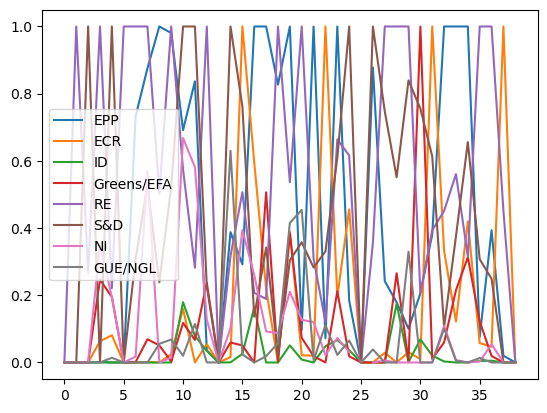

In [96]:
normalised_betweenness_party.plot()
plt.show()
#ennek így nincs értelme, vagy az abszolút maxal normálok, vagy nem normálok

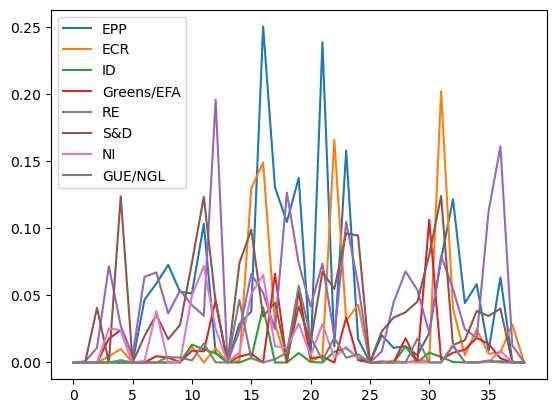

In [100]:
monthly_betweenness_centality_by_party.plot()
plt.show()